# Cleaning Census Data

In [2]:
import pandas as pd
import matplotlib.pyplot
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [6]:
census = pd.read_csv('../data/countyLevel_ACS_ADI.csv').iloc[:, 1:]
print(census.shape)
census.head()

(67, 125)


,county,RaceTotal,population_White,population_Black,population_Native,population_Asian,population_NativeHawaiian_PacificIslander,population_OtherRace,population_Multiracial,population_Multiracial_OtherRace,...,ADI_STATERNK_INT_mean,ADI_STATERNK_INT_std,ADI_STATERNK_INT_min,ADI_STATERNK_INT_25%,ADI_STATERNK_INT_50%,ADI_STATERNK_INT_75%,ADI_STATERNK_INT_max,ADI_SUP_GQ,ADI_SUP_PH,ADI_SUP_PH-GQ
0,Adams County,102627,0.928001,0.015912,0.001501,0.007055,0.000000,0.022421,0.025110,0.006499,...,3.627907,1.272853,2.0,3.0,3.0,4.0,6.0,2.0,0.0,0.0
1,Allegheny County,1218380,0.790337,0.129957,0.001179,0.039232,0.000421,0.008208,0.030664,0.005123,...,5.867155,2.902270,1.0,3.0,6.0,8.0,10.0,7.0,13.0,0.0
2,Armstrong County,65356,0.973300,0.008660,0.000245,0.003075,0.000000,0.001331,0.013388,0.003534,...,7.484848,1.711881,3.0,7.0,8.0,9.0,10.0,0.0,0.0,0.0
3,Beaver County,164781,0.897294,0.059285,0.000910,0.004606,0.000310,0.003848,0.033748,0.006384,...,6.663934,2.309201,2.0,5.0,7.0,9.0,10.0,1.0,0.0,0.0
4,Bedford County,48154,0.973377,0.010321,0.001288,0.002388,0.000000,0.001350,0.011276,0.003738,...,6.947368,1.469462,4.0,6.0,7.0,8.0,10.0,0.0,0.0,0.0


In [10]:
# Find ADI columns
adi_cols = ['ADI_STATERNK_INT' in c for c in census.columns]
adi_cols[0] = True
adi = census.iloc[:,adi_cols]
adi.head()

,county,ADI_STATERNK_INT_count,ADI_STATERNK_INT_mean,ADI_STATERNK_INT_std,ADI_STATERNK_INT_min,ADI_STATERNK_INT_25%,ADI_STATERNK_INT_50%,ADI_STATERNK_INT_75%,ADI_STATERNK_INT_max
0,Adams County,43.0,3.627907,1.272853,2.0,3.0,3.0,4.0,6.0
1,Allegheny County,956.0,5.867155,2.902270,1.0,3.0,6.0,8.0,10.0
2,Armstrong County,66.0,7.484848,1.711881,3.0,7.0,8.0,9.0,10.0
3,Beaver County,122.0,6.663934,2.309201,2.0,5.0,7.0,9.0,10.0
4,Bedford County,38.0,6.947368,1.469462,4.0,6.0,7.0,8.0,10.0


In [11]:
# Find demographic data columns
demo = census.iloc[:, ['ADI' not in c for c in census.columns]]
demo.head()

,county,RaceTotal,population_White,population_Black,population_Native,population_Asian,population_NativeHawaiian_PacificIslander,population_OtherRace,population_Multiracial,population_Multiracial_OtherRace,...,age_50_54,age_55_59,age_60_61,age_62_64,age_65_66,age_67_69,age_70_74,age_75_79,age_80_84,age_85+
0,Adams County,102627,0.928001,0.015912,0.001501,0.007055,0.000000,0.022421,0.025110,0.006499,...,0.072700,0.074337,0.029573,0.045992,0.031863,0.037446,0.049149,0.035985,0.023834,0.025218
1,Allegheny County,1218380,0.790337,0.129957,0.001179,0.039232,0.000421,0.008208,0.030664,0.005123,...,0.062659,0.071552,0.030238,0.041723,0.026211,0.035642,0.043303,0.031728,0.022149,0.030354
2,Armstrong County,65356,0.973300,0.008660,0.000245,0.003075,0.000000,0.001331,0.013388,0.003534,...,0.070873,0.074607,0.038527,0.050967,0.029378,0.043959,0.051273,0.035605,0.032530,0.029056
3,Beaver County,164781,0.897294,0.059285,0.000910,0.004606,0.000310,0.003848,0.033748,0.006384,...,0.068861,0.079554,0.032789,0.046923,0.026915,0.041795,0.050619,0.037001,0.027758,0.030446
4,Bedford County,48154,0.973377,0.010321,0.001288,0.002388,0.000000,0.001350,0.011276,0.003738,...,0.072289,0.079121,0.031005,0.048532,0.029385,0.035054,0.057046,0.047452,0.027371,0.031088


In [12]:
# Create/transform features in dataset
demo2 = demo[['county']].copy()
demo2['population_White'] = demo['population_White']*100
demo2['population_Black'] = demo['population_Black']*100
demo2['population_Asian'] = demo['population_Asian']*100
demo2['population_Native'] = demo['population_Native']*100
demo2['population_NativeHawaiian_PacificIslander'] = demo['population_NativeHawaiian_PacificIslander']*100
demo2['population_OtherRace'] = demo['population_OtherRace']*100
demo2['county'] = demo['county'].str.split(' ').str[0]
demo2['perc_poverty'] = demo['PovertyTotal']/demo['RaceTotal']
demo2['perc_below_poverty'] = demo['pop_w_income_below_poverty_level']/demo['RaceTotal']
demo2['perc_unemployed'] = demo['EmploymentTotal']/demo['RaceTotal']
demo2['per_capita_income'] = demo['Estimate!!Per capita income in the past 12 months (in 2020 inflation-adjusted dollars)']
demo2['perc_educated'] = demo['EducationTotal']/demo['RaceTotal']
demo2['perc_foodstamp'] = demo['households_ReceivingFoodStamps']/demo['RaceTotal']
demo2['perc_disability'] = (demo['households_ReceivingFoodStamps_w_Disability'] + demo['households_noFoodStamps_w_Disability'])/demo['RaceTotal']
demo2['perc_vacant_housing'] = demo['housesVacant']/demo['TotalHousingUnits']
demo2['perc_rented'] = demo['housesRenterOccupied']
demo2['perc_pre200_houses'] = demo[['housesBuilt_1990_1999','housesBuilt_1980_1989','housesBuilt_1970_1979',
                                'housesBuilt_1960_1969','housesBuilt_1950_1959','housesBuilt_1940_1949',
                                'housesBuilt_pre_1940',]].sum(axis=1)/demo['TotalHousingUnits']
demo2['perc_ownHouse_occupied'] = demo['TotalOwnerOccupiedHousingUnits']/demo['TotalHousingUnits']
demo2['perc_age_under5'] = demo['age_under5']
demo2['perc_age_5_17'] = demo[['age_5_9', 'age_10_14', 'age_15_17']].sum(axis=1)
demo2['perc_age_18_24'] = demo[['age_18_19', 'age_20', 'age_21', 'age_22_24']].sum(axis=1)
demo2['perc_age_25_39'] = demo[['age_25_29', 'age_30_34', 'age_35_39']].sum(axis=1)
demo2['perc_age_40_64'] = demo[['age_40_44', 'age_45_49', 'age_50_54', 'age_55_59', 'age_60_61', 'age_62_64']].sum(axis=1)
demo2['perc_age_over65'] = demo[['age_67_69', 'age_70_74', 'age_75_79', 'age_80_84', 'age_85+']].sum(axis=1)
demo2['adi_staterank_mean'] = adi['ADI_STATERNK_INT_mean']
print(demo2.shape)
demo2.head()


(67, 25)


,county,population_White,population_Black,population_Asian,population_Native,population_NativeHawaiian_PacificIslander,population_OtherRace,perc_poverty,perc_below_poverty,perc_unemployed,...,perc_rented,perc_pre200_houses,perc_ownHouse_occupied,perc_age_under5,perc_age_5_17,perc_age_18_24,perc_age_25_39,perc_age_40_64,perc_age_over65,adi_staterank_mean
0,Adams,92.800140,1.591199,0.705467,0.150058,0.000000,2.242100,0.959377,0.076218,0.822269,...,0.221510,0.000019,0.725456,0.049617,0.151724,0.093864,0.162189,0.339112,0.171631,3.627907
1,Allegheny,79.033717,12.995699,3.923242,0.117943,0.042105,0.820844,0.973891,0.110044,0.833572,...,0.357161,0.000002,0.582312,0.052530,0.134847,0.087491,0.215702,0.320044,0.163176,5.867155
2,Armstrong,97.330008,0.866026,0.307546,0.024481,0.000000,0.133117,0.989259,0.110747,0.833038,...,0.222222,0.000028,0.663734,0.047433,0.144072,0.068425,0.157705,0.360564,0.192423,7.484848
3,Beaver,89.729398,5.928475,0.460611,0.091030,0.030950,0.384753,0.984306,0.096552,0.829477,...,0.270344,0.000011,0.660887,0.050285,0.143396,0.072472,0.181793,0.337521,0.187619,6.663934
4,Bedford,97.337708,1.032105,0.238817,0.128754,0.000000,0.134984,0.985318,0.110001,0.831997,...,0.206021,0.000036,0.648392,0.049549,0.145367,0.073431,0.154234,0.350023,0.198011,6.947368


In [13]:
# Save dataset
demo2.to_csv('../data/cleaned_census_data.csv', index=False)

In [14]:
#Check created dataset
demo = pd.read_csv('../data/cleaned_census_data.csv')
demo.head()

,county,population_White,population_Black,population_Asian,population_Native,population_NativeHawaiian_PacificIslander,population_OtherRace,perc_poverty,perc_below_poverty,perc_unemployed,...,perc_rented,perc_pre200_houses,perc_ownHouse_occupied,perc_age_under5,perc_age_5_17,perc_age_18_24,perc_age_25_39,perc_age_40_64,perc_age_over65,adi_staterank_mean
0,Adams,92.800140,1.591199,0.705467,0.150058,0.000000,2.242100,0.959377,0.076218,0.822269,...,0.221510,0.000019,0.725456,0.049617,0.151724,0.093864,0.162189,0.339112,0.171631,3.627907
1,Allegheny,79.033717,12.995699,3.923242,0.117943,0.042105,0.820844,0.973891,0.110044,0.833572,...,0.357161,0.000002,0.582312,0.052530,0.134847,0.087491,0.215702,0.320044,0.163176,5.867155
2,Armstrong,97.330008,0.866026,0.307546,0.024481,0.000000,0.133117,0.989259,0.110747,0.833038,...,0.222222,0.000028,0.663734,0.047433,0.144072,0.068425,0.157705,0.360564,0.192423,7.484848
3,Beaver,89.729398,5.928475,0.460611,0.091030,0.030950,0.384753,0.984306,0.096552,0.829477,...,0.270344,0.000011,0.660887,0.050285,0.143396,0.072472,0.181793,0.337521,0.187619,6.663934
4,Bedford,97.337708,1.032105,0.238817,0.128754,0.000000,0.134984,0.985318,0.110001,0.831997,...,0.206021,0.000036,0.648392,0.049549,0.145367,0.073431,0.154234,0.350023,0.198011,6.947368


<AxesSubplot:xlabel='adi_staterank_mean', ylabel='Count'>

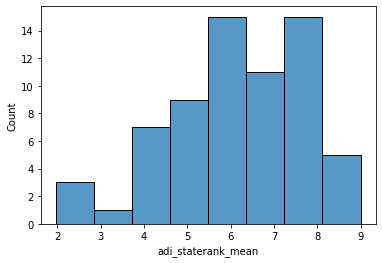

In [15]:
sns.histplot(demo['adi_staterank_mean'])